In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from datetime import datetime
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.stattools import acf, pacf
def drawAcf(indexedData_AH_shift):
  lag_acf = acf(indexedData_AH_shift, nlags=20)
  lag_pacf = pacf(indexedData_AH_shift, nlags=20, method='ols')
  #Plot ACF:
  plt.subplot(121)
  plt.plot(lag_acf)
  plt.axhline(y=0,linestyle='--',color='gray')
  plt.axhline(y=-1.96/np.sqrt(len(indexedData_AH_shift)),linestyle='--',color='gray')
  plt.axhline(y=1.96/np.sqrt(len(indexedData_AH_shift)),linestyle='--',color='gray')
  plt.title('Autocorrelation Function')
  plt.show()
  #Plot PACF:
  plt.subplot(122)
  plt.plot(lag_pacf)
  plt.axhline(y=0,linestyle='--',color='gray')
  plt.axhline(y=-1.96/np.sqrt(len(indexedData_AH_shift)),linestyle='--',color='gray')
  plt.axhline(y=1.96/np.sqrt(len(indexedData_AH_shift)),linestyle='--',color='gray')
  plt.title('Partial Autocorrelation Function')
  plt.show()

In [2]:
data = pd.read_excel("./AirQuality.xlsx", parse_dates=[['Date', 'Time']])
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [3]:
data = data.replace(-200, np.nan)
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.707856,218.811816,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,1.453252,217.084571,204.459921,7.449640,266.829000,212.971224,256.815106,48.359250,346.204540,398.480897,8.832888,17.316389,0.403813
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.100000,936.750000,67.000000,4.436942,734.375000,98.000000,657.875000,78.000000,1226.625000,731.375000,11.787500,35.812500,0.736769
50%,1.800000,1063.000000,150.000000,8.239851,909.000000,179.800000,805.500000,109.000000,1462.750000,963.250000,17.750000,49.550000,0.995395
75%,2.900000,1231.250000,297.000000,13.988478,1116.250000,326.000000,969.250000,142.000000,1673.500000,1273.375000,24.400000,62.500001,1.313701
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
Date_Time        9357 non-null datetime64[ns]
CO(GT)           7674 non-null float64
PT08.S1(CO)      8991 non-null float64
NMHC(GT)         914 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: datetime64[ns](1), float64(13)
memory usage: 1023.5 KB


In [5]:
data["CO(GT)"] = data["CO(GT)"].fillna(np.mean(data["CO(GT)"]))
data["PT08.S1(CO)"] = data["PT08.S1(CO)"].fillna(np.mean(data["PT08.S1(CO)"]))
data["C6H6(GT)"] = data["C6H6(GT)"].fillna(np.mean(data["C6H6(GT)"]))
data["PT08.S2(NMHC)"] = data["PT08.S2(NMHC)"].fillna(np.mean(data["PT08.S2(NMHC)"]))
data["NOx(GT)"] = data["NOx(GT)"].fillna(np.mean(data["NOx(GT)"]))
data["PT08.S3(NOx)"] = data["PT08.S3(NOx)"].fillna(np.mean(data["PT08.S3(NOx)"]))
data["NO2(GT)"] = data["NO2(GT)"].fillna(np.mean(data["NO2(GT)"]))
data["PT08.S4(NO2)"] = data["PT08.S4(NO2)"].fillna(np.mean(data["PT08.S4(NO2)"]))
data["PT08.S5(O3)"] = data["PT08.S5(O3)"].fillna(np.mean(data["PT08.S5(O3)"]))
data["T"] = data["T"].fillna(np.mean(data["T"]))
data["RH"] = data["RH"].fillna(np.mean(data["RH"]))
data["AH"] = data["AH"].fillna(np.mean(data["AH"]))
data = data.drop(columns=["NMHC(GT)"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
Date_Time        9357 non-null datetime64[ns]
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 950.4 KB


In [6]:
data.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.152750,1099.707856,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,1.316068,212.796116,7.302474,261.557856,193.419417,251.741784,43.911095,339.365351,390.609000,8.658396,16.974308,0.395836
min,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.200000,941.250000,4.591495,742.500000,112.000000,665.500000,85.900000,1241.500000,741.750000,12.025000,36.550000,0.746115
50%,2.152750,1074.500000,8.593367,923.250000,229.000000,817.500000,113.075515,1456.143486,982.500000,18.275000,49.232360,1.015441
75%,2.600000,1221.250000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [7]:
data = data.set_index('Date_Time')
data.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [8]:
data.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.773394,0.812392,0.795586,0.762297,-0.613870,0.646528,0.558225,0.759027,0.020260,0.043204,0.043273
PT08.S1(CO),0.773394,1.000000,0.883821,0.892972,0.615974,-0.771918,0.562997,0.682874,0.899326,0.048628,0.114607,0.135323
C6H6(GT),0.812392,0.883821,1.000000,0.981962,0.616880,-0.735711,0.536178,0.765717,0.865727,0.198891,-0.061643,0.167909
PT08.S2(NMHC),0.795586,0.892972,0.981962,1.000000,0.601812,-0.796687,0.561421,0.777235,0.880590,0.241330,-0.090352,0.186906
NOx(GT),0.762297,0.615974,0.616880,0.601812,1.000000,-0.563259,0.763133,0.205526,0.688214,-0.235657,0.192578,-0.126831
PT08.S3(NOx),-0.613870,-0.771918,-0.735711,-0.796687,-0.563259,1.000000,-0.569535,-0.538460,-0.796554,-0.145133,-0.056730,-0.232021
NO2(GT),0.646528,0.562997,0.536178,0.561421,0.763133,-0.569535,1.000000,0.140940,0.629564,-0.165317,-0.080645,-0.291200
PT08.S4(NO2),0.558225,0.682874,0.765717,0.777235,0.205526,-0.538460,0.140940,1.000000,0.591137,0.561333,-0.032188,0.629644
PT08.S5(O3),0.759027,0.899326,0.865727,0.880590,0.688214,-0.796554,0.629564,0.591137,1.000000,-0.027193,0.124952,0.070738
T,0.020260,0.048628,0.198891,0.241330,-0.235657,-0.145133,-0.165317,0.561333,-0.027193,1.000000,-0.578569,0.656471


In [9]:
x_train = data.drop(columns=["RH", "AH"], axis = 1)
y_train = pd.concat([data["RH"]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)

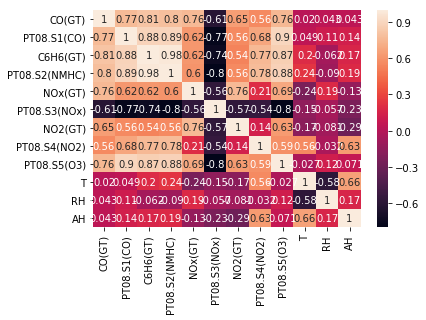

In [10]:
sns.heatmap(data.corr(),annot=True)